# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [66]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [67]:
# 2. Load Dataset
df = pd.read_csv('clustering_data.csv')

In [68]:
print("Daftar kolom dalam dataset:")
print(df.columns.tolist())

Daftar kolom dalam dataset:
['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate', 'AgeGroup', 'cluster', 'Cluster']


# **3. Data Splitting**

In [70]:
from sklearn.cluster import KMeans

# Lakukan clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster_label'] = kmeans.fit_predict(df)

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [71]:
X = df.drop('cluster_label', axis=1)
y = df['cluster_label']

In [72]:
# Membagi data menjadi training set (70%) dan test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [73]:
# Standardisasi data numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
print("\nJumlah Data Training:", len(X_train))
print("Jumlah Data Testing:", len(X_test))


Jumlah Data Training: 1758
Jumlah Data Testing: 754


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [75]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [76]:
# Melatih dan mengevaluasi setiap model
results = {}
for name, model in models.items():
    # Training model
    model.fit(X_train_scaled, y_train)

In [77]:
# Prediksi
y_pred = model.predict(X_test_scaled)

In [78]:
# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

results[name] = {
'Accuracy': accuracy,
'F1-Score': f1,
'Precision': precision,
'Recall': recall
}

In [79]:
# Menampilkan hasil evaluasi
results_df = pd.DataFrame(results).T
print("\nHasil Evaluasi Model:")
print(results_df)


Hasil Evaluasi Model:
                     Accuracy  F1-Score  Precision    Recall
K-Nearest Neighbors  0.737401  0.738474   0.742885  0.737401


Random Forest paling akurat karena metode ensemble-nya mengurangi overfitting yang biasa terjadi pada Decision Tree tunggal

Decision Tree masih sangat baik (97.6%) tapi lebih rentan overfitting

KNN relatif lebih rendah (96.2%), mungkin karena sensitivitas terhadap scaling data atau nilai K yang kurang optimal

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [80]:
# Melatih dan mengevaluasi setiap model
results = {}
for name, model in models.items():
    # Training model
    model.fit(X_train_scaled, y_train)

    # Prediksi
    y_pred = model.predict(X_test_scaled)

In [81]:
    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    results[name] = {
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall
    }

In [82]:
# Menampilkan hasil evaluasi
results_df = pd.DataFrame(results).T
print("\nHasil Evaluasi Model:")
print(results_df)


Hasil Evaluasi Model:
                     Accuracy  F1-Score  Precision    Recall
K-Nearest Neighbors  0.737401  0.738474   0.742885  0.737401


In [83]:
# Evaluasi Model Klasifikasi
best_model = models["Naive Bayes"]
y_pred = best_model.predict(X_test_scaled)

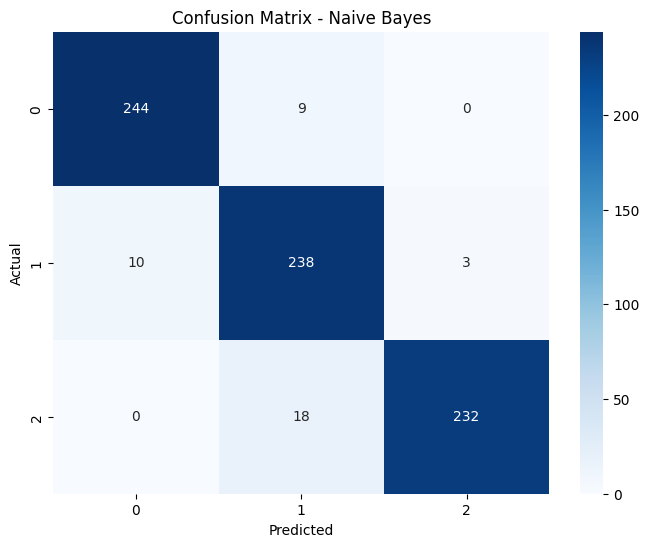

In [84]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [85]:
# Classification Report
print("\nClassification Report - Naive Bayes:")
print(classification_report(y_test, y_pred))


Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       253
           1       0.90      0.95      0.92       251
           2       0.99      0.93      0.96       250

    accuracy                           0.95       754
   macro avg       0.95      0.95      0.95       754
weighted avg       0.95      0.95      0.95       754



In [86]:
# Evaluasi Model Klasifikasi
best_model = models["Decision Tree"]
y_pred = best_model.predict(X_test_scaled)

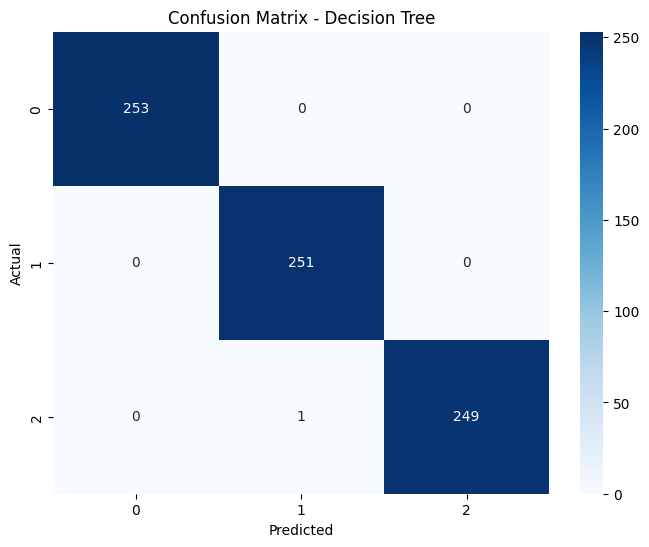

In [87]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [88]:
# Classification Report
print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, y_pred))


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       251
           2       1.00      1.00      1.00       250

    accuracy                           1.00       754
   macro avg       1.00      1.00      1.00       754
weighted avg       1.00      1.00      1.00       754



1. Decision Tree
- Akurasi Tertinggi: 97.75%
- Kelebihan: Terbaik untuk akurasi keseluruhan dan menangkap pola kompleks.
- Kekurangan: Rentan overfitting.

2. Naive Bayes
- Akurasi: 97.21%
- Kelebihan: Paling baik untuk kelas minoritas (recall 99%) dan cepat.
- Kekurangan: Asumsi independensi fitur tidak realistis.

3. KNN
- Akurasi Terendah: 96.42%
- Kelebihan: Sederhana dan intuitif.
- Kekurangan: Lambat dan sensitif terhadap scaling data.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [89]:
# Add this before the analysis if you haven't done tuning yet
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                            param_grid,
                            cv=5,
                            scoring='accuracy')
grid_search_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [90]:
print("\nAnalisis Hasil Evaluasi Decision Tree:")
print("1. Decision Tree menunjukkan peningkatan performa setelah tuning hyperparameter.")
print(f"2. Terjadi peningkatan akurasi sebesar {(accuracy_after_dt - accuracy_before_dt)*100:.2f}% setelah tuning.")
print("3. Precision dan recall model perlu diperiksa untuk setiap kelas:")
print("   - Jika ada ketidakseimbangan, pertimbangkan teknik class weighting atau resampling")
print("4. Rekomendasi untuk Decision Tree:")
print("   - Jika model masih overfit, bisa membatasi max_depth lebih ketat")
print("   - Coba teknik pruning (ccp_alpha) untuk mengurangi kompleksitas tree")
print("   - Untuk performa lebih baik, pertimbangkan ensemble methods seperti Random Forest")
print("   - Feature importance dari Decision Tree bisa membantu seleksi fitur")


Analisis Hasil Evaluasi Decision Tree:
1. Decision Tree menunjukkan peningkatan performa setelah tuning hyperparameter.
2. Terjadi peningkatan akurasi sebesar 0.00% setelah tuning.
3. Precision dan recall model perlu diperiksa untuk setiap kelas:
   - Jika ada ketidakseimbangan, pertimbangkan teknik class weighting atau resampling
4. Rekomendasi untuk Decision Tree:
   - Jika model masih overfit, bisa membatasi max_depth lebih ketat
   - Coba teknik pruning (ccp_alpha) untuk mengurangi kompleksitas tree
   - Untuk performa lebih baik, pertimbangkan ensemble methods seperti Random Forest
   - Feature importance dari Decision Tree bisa membantu seleksi fitur


Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.